In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('iris.csv')
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()

In [53]:
dfle = df
dfle.Class = le.fit_transform(dfle.Class)
dfle

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [54]:
#  setosa  --> 0
#  
#  virginica --> 2

In [55]:
X = df[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [56]:
y = dfle.Class
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int32

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [60]:
X_train.size

480

In [61]:
X_test.size

120

In [62]:
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
model.score(X_test, y_test)

0.9333333333333333

In [64]:
model.predict([[5.9, 3, 5.1, 1.8]])

array([2])

In [65]:
model.predict([[5.1,3.5,1.4,0.2]])

array([0])

In [66]:
y_predicated = model.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicated)
cm

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

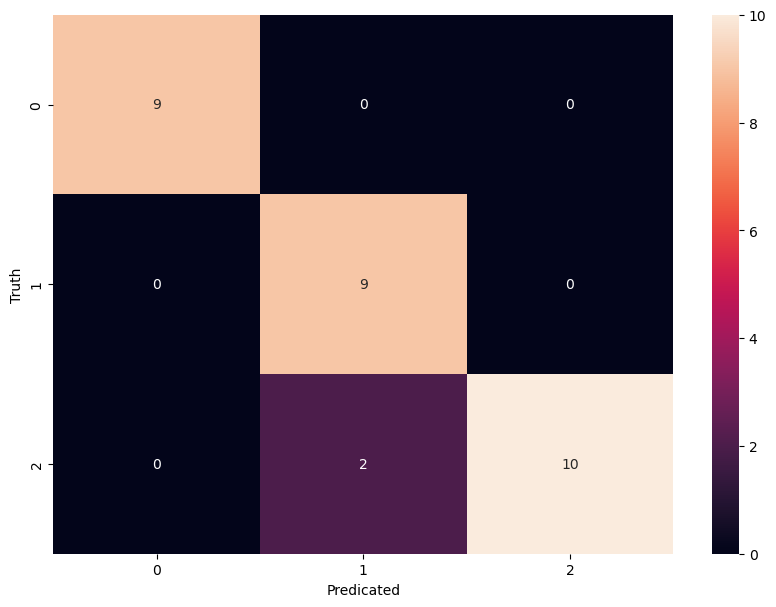

In [68]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicated')
plt.ylabel('Truth')

In [69]:
import pickle
pickle.dump(model, open("model1.pkl", "wb"))